# Project: Compute the Profit Diagram for a Jade Lizard at Expiration
The [Jade-Lizard](https://www.tastylive.com/concepts-strategies/jade-lizard) is a composite options trade consisting of three option legs. The [Jade-Lizard](https://www.tastylive.com/concepts-strategies/jade-lizard) was created by [tasty-traders Liz and Jny](https://www.tastylive.com/shows/tweeting-live-with-liz-jny). A Jade Lizard is a relatively simple and popular option strategy best deployed when the trader has a neutral (i.e., sideways or range-bound) to bullish view of a given security. The [Jade-Lizard](https://www.tastylive.com/concepts-strategies/jade-lizard) consists of:
* __Option 1__: 1 $\times$ `short put` contract with strike price $K_{1}$ USD/share and premium $\mathcal{P}_{1}$ USD/share
* __Option 2__: 1 $\times$ `short call` contract with strike price $K_{2}$ USD/share and premium $\mathcal{P}_{2}$ USD/share
* __Option 3__: 1 $\times$ `long call` contract with strike price $K_{3}>K_{2}$ USD/share and premium $\mathcal{P}_{3}$ USD/share

### Learning objectives
The objective of this project is to familiarize students with constructing profit diagrams at expiration for typical composite options contracts, i.e., the [Jade-Lizard](https://www.tastylive.com/concepts-strategies/jade-lizard).

* __Task 1__: Create the option contract models for the `Jade Lizard`
    * `TODO`: Create `short put`, `short call`, and `long call` contract models using the strike prices and premiums provided below
* __Task 2__: Compute the profit array at expiration for the `Jade Lizard`
    * `TODO`: Build an array of share prices at expiration from `45.0` to `85.0` (already completed for you)
    * `TODO`: Compute the profit array at expiration using the `profit(...)` function.
* __Task 3__: Compute the properties of the `Jade Lizard`
    * `TODO`: Compute the breakeven point at expiration for the trade
    * `TODO`: Compute the maximum profit and maximum loss for the trade

## Setup
Set up the computational environment by including the `Include.jl` file. The `Include.jl` file loads external packages, various functions we will use in the exercise, and custom types to model the components of our example problem.
* For additional information on functions and types used in this material, see the [Julia programming language documentation](https://docs.julialang.org/en/v1/) and the [VLQuantitativeFinancePackage.jl documentation](https://github.com/varnerlab/VLQuantitativeFinancePackage.jl). 

In [1]:
include("Include.jl");

    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
   Resolving package versions...
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-133/module-4/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-133/module-4/Manifest.toml`
  Activating project at `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-133/module-4`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-133/module-4/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-133/module-4/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
    Updating `~/Desktop/julia_work/CHEME-130-eCornell-Repository/courses/CHEME-133/module-4/Project.toml`
  [5789e2e9] ↑ FileIO v1.16.2 ⇒ v1.16.3
    Updating `~/Desktop/julia_work/CHEME-

### Strikes and Option prices

In [2]:
strike_price_array = [
    60.0 ; # 1 short put
    65.0 ; # 2 short call
    70.0 ; # 4 long call
];

option_premium_array = [
    4.95 ; # 1 short put
    3.85 ; # 2 short call
    2.25 ; # 3 long call
];

## Task 1: Create the option contract models for the `Jade Lizard`
We can construct the contract models using the `build(...)` method. To do the profit diagram calculation at expiration, we need to pass in a few pieces of information into the `build(...)` method:

* The profit diagram calculation requires passing the strike price `K`, the `premium` value, the `sense`, and the number of contracts in the `copy` parameter into the `build(...)` method for each contract model.

For example, to construct a model of the short put leg of the trade, we issue the command (`sense = -1` means short):

In [3]:
short_put_model = build(MyAmericanPutContractModel, (
    K = strike_price_array[1] , premium = option_premium_array[1], sense = -1, copy = 1
));

Construct the `short call` leg of the trade, save this model in the `short_call_model` variable:

In [4]:
short_call_model = build(MyAmericanCallContractModel, (
    K = strike_price_array[2] , premium = option_premium_array[2], sense = -1, copy = 1
));

Construct the `long call` leg of the trade, save this model in the `long_call_model` variable (`sense = 1` means long):

In [5]:
long_call_model = build(MyAmericanCallContractModel, (
    K = strike_price_array[3] , premium = option_premium_array[3], sense = 1, copy = 1
));

## Task 2: Compute the profit array at expiration for the `Jade Lizard`
Next, we generate an array of share prices at expiration and store them in the `S` array (we've already done this for you):

In [6]:
S = range(45.0, stop = 85.0, length = 1000) |> collect; # nothing to do here, move along ...

Finally, we can compute the `profit` for the [Jade Lizard](https://www.tastylive.com/concepts-strategies/jade-lizard) by calling the `profit(...)` function. 
* Pass in an array of contract models as the first argument and the array of share prices at expiration `S` as the second argument to the `profit(…)` function. The `profit(…)` function returns an array holding the share price at expiration in `col 1`, the P/L for each leg in `col 2 ... col C`, and the overall P/L in the last column. Each row corresponds to a different share price at expiration.

Let's store the output from the `profit(...)` function in the `profit_array` variable:

In [7]:
profit_array = profit([short_put_model, short_call_model, long_call_model], S)

1000×5 Matrix{Float64}:
 45.0     -10.05       3.85    -2.25    -8.45
 45.04    -10.01       3.85    -2.25    -8.40996
 45.0801   -9.96992    3.85    -2.25    -8.36992
 45.1201   -9.92988    3.85    -2.25    -8.32988
 45.1602   -9.88984    3.85    -2.25    -8.28984
 45.2002   -9.8498     3.85    -2.25    -8.2498
 45.2402   -9.80976    3.85    -2.25    -8.20976
 45.2803   -9.76972    3.85    -2.25    -8.16972
 45.3203   -9.72968    3.85    -2.25    -8.12968
 45.3604   -9.68964    3.85    -2.25    -8.08964
 45.4004   -9.6496     3.85    -2.25    -8.0496
 45.4404   -9.60956    3.85    -2.25    -8.00956
 45.4805   -9.56952    3.85    -2.25    -7.96952
  ⋮                                     
 84.5596    4.95     -15.7096  12.3096   1.55
 84.5996    4.95     -15.7496  12.3496   1.55
 84.6396    4.95     -15.7896  12.3896   1.55
 84.6797    4.95     -15.8297  12.4297   1.55
 84.7197    4.95     -15.8697  12.4697   1.55
 84.7598    4.95     -15.9098  12.5098   1.55
 84.7998    4.95     -15.94

### Visualize
`Unhide` the code block below to see how to visualize the share price at expiration versus the profit with the help of `plot(...)` functions from the [Plots.jl](https://github.com/JuliaPlots/Plots.jl) package:

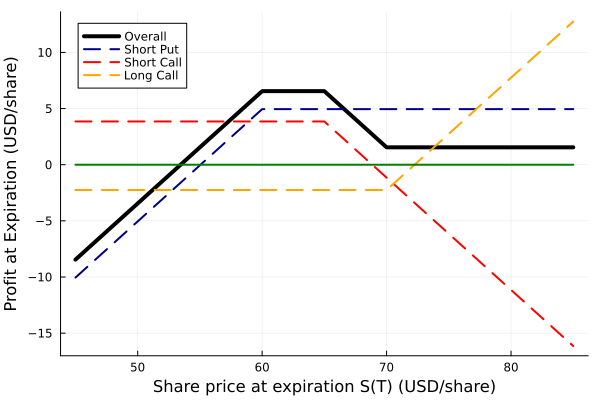

In [8]:
plot(profit_array[:,1], profit_array[:,end], lw=4, c=:black, label="Overall")
plot!(profit_array[:,1], profit_array[:,2], lw=2, label="Short Put", c=:navyblue, ls=:dash)
plot!(profit_array[:,1], profit_array[:,3], lw=2, label="Short Call", c=:red, ls=:dash)
plot!(profit_array[:,1], profit_array[:,4], lw=2, label="Long Call", c=:orange, ls=:dash)

# draw a BEL -
BEL = zeros(length(profit_array[:,1]));
plot!(profit_array[:,1], BEL, lw=2, label="", c=:green)

xlabel!("Share price at expiration S(T) (USD/share)", fontsize=18)
ylabel!("Profit at Expiration (USD/share)", fontsize=18)

## Task 3: Compute the properties of the `Jade Lizard`
* `TODO`: Compute the breakeven point at expiration for the trade 
    * Develop an analytical expression for the break-even, check your analytical value using the P/L graph
* `TODO`: Compute the maximum profit and maximum loss for the trade
    * Develop an analytical expression for the maximum profit, check your value using the P/L graph

### Analytical profit function analysis
The `Jade Lizard` is a composite contract; thus, we can use the individual profit expressions to compute the overall profit for the trade:

$$
\hat{P} = -(K_{1}-S)^{+} - (S-K_{2})^{+} + (S-K_{3})^{+} + \left(\mathcal{P}_{1}+\mathcal{P}_{2} - \mathcal{P}_{3}\right)
$$

where $(K_{1}-S)^{+}$ denotes the payoff for the `short put,` $(S-K_{2})^{+}$ denotes the payoff for the `short call,` and $(S-K_{3})^{+}$ denotes the payoff for the `long call`. The $(K_{1}-S)^{+}$ notation is shorthand for the payoff of a `put` option $(K_{1}-S)^{+} = \max(K_{1}-S,0)$, and $(S-K_{2})^{+}$ is shorthand for the payoff for a `call` option $(S-K_{\star})^{+} = \max(S-K_{\star},0)$

#### Breakeven
The `breakeven` for the trade occurs when $\hat{P} = 0$. From the profit diagram, we know the `breakeven` point occurs when $S<K_{1}$, which gives the expression:

$$
-(K_{1} - S^{\star}) + \left(\mathcal{P}_{1}+\mathcal{P}_{2} - \mathcal{P}_{3}\right) = 0
$$

from which we can solve for the `breakeven` share price $S^{\star}$:

$$
S^{\star} = K_{1} - \left(\mathcal{P}_{1}+\mathcal{P}_{2} - \mathcal{P}_{3}\right)
$$

In [9]:
breakeven_share_price = strike_price_array[1] - (option_premium_array[1] + option_premium_array[2] - option_premium_array[3]);
println("The breakeven for the Jade Lizard is: $(breakeven_share_price) USD/share")

The breakeven for the Jade Lizard is: 53.45 USD/share


### Max profit and loss
The maximum loss is `undefined` for the `Jade Lizard`; thus, this trade has undefined downside risk as $S\rightarrow{0}$. From the profit diagram, we can see that the maximum profit occurs when $K_{1}\leq{S}\leq{K_{2}}$. To compute the maximum profit, substitute any share price between $K_{1}$ and $K_{2}$, i.e., the midpoint value $S = (K_{1}+K_{2})/{2}$ into the profit expression above, which gives the maximum profit:

$$\text{max profit Jade Lizard} = \left(\mathcal{P}_{1}+\mathcal{P}_{2} - \mathcal{P}_{3}\right)$$

In [10]:
max_profit_jade_lizard = (option_premium_array[1] + option_premium_array[2] - option_premium_array[3]);
println("The maximum profit for the Jade Lizard: $(max_profit_jade_lizard) USD/share")

The maximum profit for the Jade Lizard: 6.550000000000001 USD/share


## Disclaimer and Risks

__This content is offered solely for training and informational purposes__. No offer or solicitation to buy or sell securities or derivative products or any investment or trading advice or strategy is made, given, or endorsed by the teaching team.

__Trading involves risk__. Carefully review your financial situation before investing in securities, futures contracts, options, or commodity interests. Past performance, whether actual or indicated by historical tests of strategies, is no guarantee of future performance or success. Trading is generally inappropriate for someone with limited resources, investment or trading experience, or a low-risk tolerance. Only risk capital that is not required for living expenses.

__You are fully responsible for any investment or trading decisions you make__. Such decisions should be based solely on evaluating your financial circumstances, investment or trading objectives, risk tolerance, and liquidity needs.